### Logistic Regression - Andrew Ng course implementation

*In a lot of ways, linear regression and logistic regression are similar. Linear regression algorithms are used to predict/forecast values but logistic regression is used for classification tasks.*
 For example, classifying whether an email is a spam or not, classifying whether a tumour is malignant or benign, classifying whether a website is fraudulent or not, etc.

**Sigmoid Function (Logistic Function)**

The predicted value can be anywhere between negative infinity to positive infinity. We need the output of the algorithm to be class variable, i.e 0-no, 1-yes. Therefore, we are squashing the output of the linear equation into a range of [0,1]. To squash the predicted value between 0 and 1, we use the sigmoid function.

Our hypothesis should satisfy:

$ 0 \le h_θ(x) \le 1 $

Sigmoid Function:
    
$ h_θ(x)=g(θ^T x) $

$ z=θ^T x $

$ g(z) = 1 / 1+e^−z $

*We take the output(z) of the linear equation and give to the function g(x) which returns a squashed value h, the value h will lie in the range of 0 to 1.*

**Cost Function**

we use a logarithmic loss function to calculate the cost for misclassifying. Instead of Mean Squared Error, we use a cost function called Cross-Entropy, also known as Log Loss. Cross-entropy loss can be divided into two separate cost functions: one for y=1 and one for y=0.

    
$ J(θ) = \sum \limits _{i=1} ^{m} Cost(h_θ(x^{(i)}),y^{(i)}) $

$ Cost(h_θ (x),y) = −log(h_θ (x))  $      *if y = 1*

$ Cost(h_θ (x),y) = −log(1− h_θ (x))  $   *if y = 0*

**Above functions compressed into one**

$ J(θ) = −\frac{1}{m}\sum \limits _{i=1} ^{m} [y^{(i)}log(h_θ(x^{(i)})) + (1− y^{(i)})log(1− h_θ(x^{(i)}))] $

**Gradient Descent**

$ s′(z)=s(z)(1−s(z)) $

 convenient cost function derivative,
    
$ C′=x(s(z)−y) $    

**NOTE**
+ C′ is the derivative of cost with respect to weights
+ y is the actual class label (0 or 1)
+ s(z) is your model’s prediction
+ x is your feature or feature vector.

$ Repeat \{
    θj:=θj−α . \frac{\alpha}{m}(h_θ(x^{(i)})−y^{(i)})x^{(i)} . j
\}$

**Code**

In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university.

$ \rhd $ Problem context:
    
    Suppose that you are the administrator of a university department and you want to determine each applicant’s     chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision.

    Your task is to build a classification model that estimates an applicant’s probability of admission based on the scores from those two exams.

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt      
import warnings
warnings.filterwarnings('ignore')

**Read The Data  - week 3s assignment** 

In [72]:
data = pd.read_csv('ex2data1.txt', header = None)
X = data.iloc[:,: -1]
y = data.iloc[:, 2]
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [73]:
print(X.shape)
print(y.shape)

(100, 2)
(100,)


*So we have two independent features and one dependent variable. Here 0 means candidate was unable to get an admission and 1 vice-versa.*

**Visualizing the data**

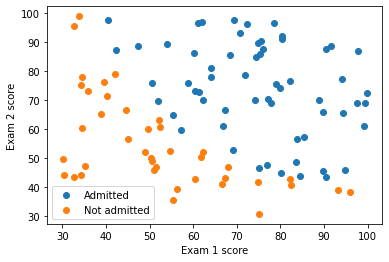

In [74]:
mask = y == 1
admit = plt.scatter(X[mask][0].values, X[mask][1].values)
not_admit = plt.scatter(X[~ mask][0].values, X[~ mask][1].values)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend((adm, not_adm), ('Admitted', 'Not admitted'))
plt.show()

Before actual cost function, logistic regression hypothesis makes use of sigmoid function

**Sigmoid Function**

In [75]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

Note that here we are writing the vectorized code. So it really doesn’t matter whether x is a scalar or a vector or a matrix or a tensor

**Cost function**

In [76]:
def costFunction(theta, X, y):
    J = (-1 / m) * np.sum(np.multiply(y, np.log(sigmoid(X @ theta))) + np.multiply((1-y), np.log(1 - sigmoid(X @ theta))))
    return J

**Gradient Function**

A vectorized implementation is:

$ \theta := \theta - \frac{\alpha} {m} X^{T} (g(X \theta ) - \vec{y}) $

In [77]:
def gradient(theta, X, y):
    return ((1 / m) * X.T @ (sigmoid(X @ theta) - y))

Note that while this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of hypothesis functions.

In [78]:
(m, n) = X.shape
X = np.hstack((np.ones((m, 1)), X))    #numpy.hstack() function is used to stack the sequence of input arrays horizontally (i.e. column wise) to make a single array.
y = y[:, np.newaxis]
theta = np.zeros((n+1,1))                # intializing theta with all zeros

In [79]:
J = costFunction(theta, X, y)
print(J)

0.6931471805599453


**Learning parameters using fmin_tnc**

 instead of taking the gradient descent steps, we will use a built-in function **fmin_tnc** from scipy library.
    **fmin_tnc** is an optimization solver that finds the minimum of an unconstrained function.
    Constraints in optimization often refer to constraints on the parameters. For example, constraints that bound the possible values theta can take (e.g., theta ≤ 1). Logistic regression does not have such constraints since theta is allowed to take any real value
    
    Concretely, you are going to use fmin_tnc to find the best or optimal parameters theta for the logistic regression cost function, given a fixed dataset (of X and y values). 
You will pass to fmin_tnc the following inputs:
+ The initial values of the parameters we are trying to optimize.
+ A function that, when given the training set and a particular theta, computes the logistic regression cost and gradient with respect to theta for the dataset (X, y).

In [80]:
temp = opt.fmin_tnc(func = costFunction, 
                    x0 = theta.flatten(),
                    fprime = gradient, 
                    args = (X, y.flatten()))

#the output of above function is a tuple whose first element contains the optimized values of theta

theta_optimized = temp[0]
print(theta_optimized)

[-25.16131857   0.20623159   0.20147149]


**Note:**  The flatten() function reduces a column or row vector into array format.

Notice that by using fmin_tnc, you did not have to write any loops yourself, or set a learning rate like you did for gradient descent. This is all done by **fmin_tnc**. You only needed to provide a function for calculating the cost and the gradient

In [81]:
J = costFunction(theta_optimized[:,np.newaxis], X, y)
print(J)

0.20349770158947483


**Plotting Decision Boundary**

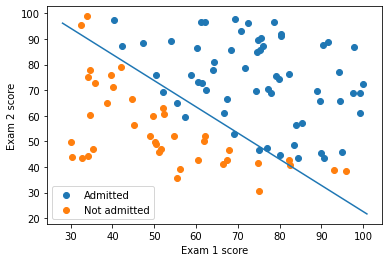

In [82]:
plot_x = [np.min(X[:, 1] - 2), np.max(X[:, 2] + 2)]
plot_y = -1 / theta_optimized[2] * (theta_optimized[0] + np.dot(theta_optimized[1],plot_x)) 

mask = y.flatten() == 1
admit = plt.scatter(X[mask][:,1], X[mask][:,2])
not_admit = plt.scatter(X[~ mask][:, 1], X[~ mask][:, 2])

decision_boun = plt.plot(plot_x, plot_y)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend((admit, not_admit), ('Admitted', 'Not admitted'))
plt.show()

**Model Accuracy**

In [83]:
def accuracy(X, y, theta, cutoff):
    pred = [sigmoid(np.dot(X, theta)) >= cutoff]
    acc = np.mean(pred == y)
    print(acc * 100)
accuracy(X, y.flatten(), theta_optimized, 0.5)

89.0
